<a href="https://colab.research.google.com/github/jjevans25/UCI-Diabetes-Data/blob/master/Diabetes_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_data_upload.csv to diabetes_data_upload (1).csv


In [55]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import sys
numpy.set_printoptions(threshold=sys.maxsize)

In [42]:
Dia_df = pd.read_csv('diabetes_data_upload.csv')

In [47]:
Dia_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [46]:
Dia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(Dia_df, test_size = 0.2, random_state = 42)

In [ ]:
dia_train = train_set.drop("class", axis=1) # drop labels for training set
dia_labels = train_set["class"].copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [48]:
encoding_pipeline = Pipeline([
    ('encoding',MultiColumnLabelEncoder(columns=['Polyuria', 'Polydipsia', 'sudden weight loss',	'weakness',	
                                                 'Polyphagia',	'Genital thrush',	'visual blurring', 'Itching',	
                                                 'Irritability',	'delayed healing',	'partial paresis',	
                                                 'muscle stiffness',	'Alopecia',	'Obesity']))
    
])


In [50]:
enc_attribs = ['Polyuria', 'Polydipsia', 'sudden weight loss',	'weakness',	
               'Polyphagia',	'Genital thrush',	'visual blurring',	'Itching',	
               'Irritability',	'delayed healing',	'partial paresis',	
               'muscle stiffness',	'Alopecia',	'Obesity']
num_attribs = ['Age']
cat_attribs = list(train_set[["Gender"]])

full_pipeline = ColumnTransformer([                           
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ("encoding", encoding_pipeline, enc_attribs)
    ], remainder='passthrough')

dia_prepared = full_pipeline.fit_transform(dia_train)

In [ ]:
dia_prepared

In [ ]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(dia_prepared, dia_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [52]:
from sklearn.metrics import accuracy_score

diabetes_predictions = clf.predict(dia_prepared)

In [53]:
accuracy_score(dia_labels, diabetes_predictions)

0.9759615384615384

[[161   6]
 [  4 245]]


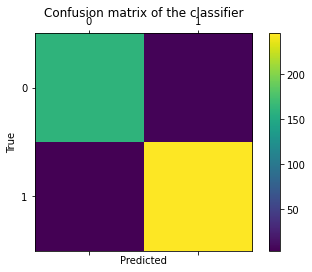

In [58]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(dia_labels, diabetes_predictions)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
X_test = test_set.drop("class", axis=1) # drop labels for testing set
y_test = test_set["class"].copy()

In [61]:
full_pipeline = ColumnTransformer([                           
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ("encoding", encoding_pipeline, enc_attribs)
    ], remainder='passthrough')

X_test_prepared = full_pipeline.fit_transform(X_test)

In [ ]:
X_test_prepared

In [60]:
diabetes_predictions = clf.predict(X_test_prepared)
accuracy_score(y_test, diabetes_predictions)

0.9615384615384616

[[30  3]
 [ 1 70]]


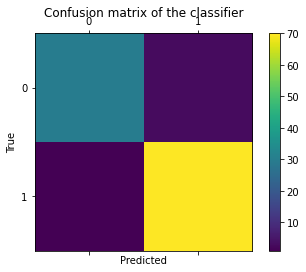

In [65]:
cm = confusion_matrix(y_test, diabetes_predictions)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [66]:
sample_data = dia_train.iloc[5:10]

In [67]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("class", SVC())
    ])

full_pipeline_with_predictor.fit(dia_train, dia_labels)
full_pipeline_with_predictor.predict(sample_data)

array(['Negative', 'Negative', 'Positive', 'Negative', 'Negative'],
      dtype=object)

In [68]:
diabetes_model = full_pipeline_with_predictor

In [71]:
import joblib
joblib.dump(diabetes_model, "diabetes_model.pkl") 

In [73]:
diabetes_model_loaded = joblib.load("diabetes_model.pkl") 

In [74]:
diabetes_model_loaded.predict(sample_data)

array(['Negative', 'Negative', 'Positive', 'Negative', 'Negative'],
      dtype=object)